In [28]:
import numpy as np
import matplotlib.pyplot as plt

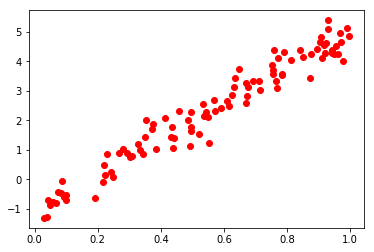

In [29]:
def getToysData(N, a, b, sigma):
    x = np.random.rand(N)
    eps = np.random.randn(N) * sigma
    y = a*x + b + eps
    return x,y

a = 6.
b = -1.
N = 100
sig = .4 # écart type

X,Y = getToysData(N, a, b, sig)

plt.plot(X, Y, 'ro')

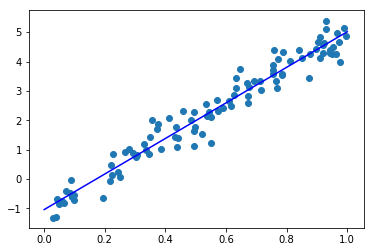

In [30]:
def estimParamProba(X, Y):
    a_est = np.cov(X, Y)[0,1] / np.cov(X, Y)[0,0]
    b_est = np.mean(Y) - ( np.cov(X, Y)[0,1] / np.cov(X, Y)[0,0] ) * np.mean(X)
    return a_est, b_est

a_est, b_est =  estimParamProba(X, Y)
T = np.array([0,1])
plt.figure()
plt.scatter(X, Y)
plt.plot(T, a_est * T + b_est, 'b')


(100, 2)
[ 6.05171896 -1.03747868]


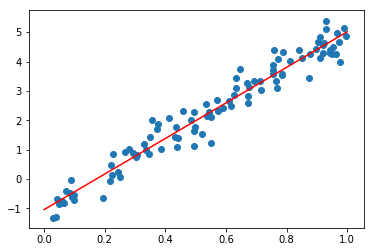

In [31]:
def moindresCarres(X, Y):
    A = np.dot( np.transpose(X), X )
    B = np.dot( np.transpose(X), Y )
    return np.linalg.solve(A, B)

Xc = np.hstack((X.reshape(N,1),np.ones((N,1))))
print(Xc.shape)
D_star = moindresCarres(Xc, Y)
print(D_star)
plt.figure()
plt.scatter(X, Y)
plt.plot(T, D_star[0] * T + D_star[1], 'r')

[1.39689677 1.81568016]
[1.51938132 1.16384101]
[1.90858167 1.10668558]
[2.20543977 0.92507157]
[2.49626938 0.78654757]
[2.76280668 0.65083666]
[3.0111673  0.52646137]
[3.24161987 0.41056793]
[3.45568254 0.30303098]
[3.65446772 0.20314212]
[3.83907824 0.11038225]
[4.01052193 0.02423675]
[ 4.16973854 -0.05576465]
[ 4.31759994 -0.13006049]
[ 4.454916   -0.19905761]
[ 4.58243881 -0.26313392]
[ 4.70086681 -0.32264036]
[ 4.81084863 -0.37790286]
[ 4.91298665 -0.42922409]
[ 5.00784028 -0.47688513]
[ 5.09592904 -0.52114704]
[ 5.17773539 -0.56225222]
[ 5.25370738 -0.60042582]
[ 5.32426112 -0.63587692]
[ 5.38978303 -0.66879967]
[ 5.45063198 -0.69937441]
[ 5.50714124 -0.72776858]
[ 5.55962031 -0.75413771]
[ 5.60835662 -0.77862621]
[ 5.6536171  -0.80136822]


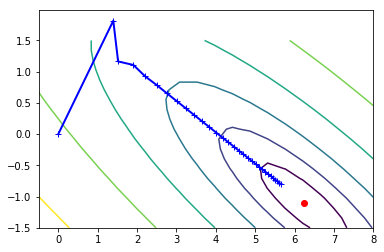

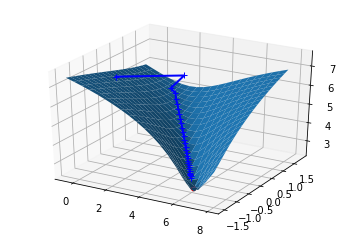

In [20]:
wstar = np.linalg.solve(Xc.T.dot(Xc), Xc.T.dot(Y)) # pour se rappeler du w optimal

eps = 5e-3
nIterations = 30
w = np.zeros(Xc.shape[1]) # init à 0
allw = [w]
for i in range(nIterations):
    w = allw[i] - eps * 2 * np.dot( np.transpose(Xc), np.dot( Xc, allw[i] ) - Y )
    allw.append(w)
    print(w)

allw = np.array(allw)

# tracer de l'espace des couts
ngrid = 20
w1range = np.linspace(-0.5, 8, ngrid)
w2range = np.linspace(-1.5, 1.5, ngrid)
w1,w2 = np.meshgrid(w1range,w2range)

cost = np.array([[np.log(((Xc.dot(np.array([w1i,w2j]))-Y)**2).sum()) for w1i in w1range] for w2j in w2range])

plt.figure()
plt.contour(w1, w2, cost)
plt.scatter(wstar[0], wstar[1],c='r')
plt.plot(allw[:,0],allw[:,1],'b+-' ,lw=2 )

from mpl_toolkits.mplot3d import Axes3D

costPath = np.array([np.log(((Xc.dot(wtmp)-Y)**2).sum()) for wtmp in allw])
costOpt  = np.log(((Xc.dot(wstar)-Y)**2).sum())

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(w1, w2, cost, rstride = 1, cstride=1 )
ax.scatter(wstar[0], wstar[1],costOpt, c='r')
ax.plot(allw[:,0],allw[:,1],costPath, 'b+-' ,lw=2 )

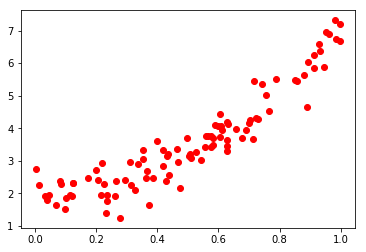

In [21]:
def getNonLinData(N, a, b, c, sigma):
    x = np.random.rand(N)
    eps = np.random.randn(N) * sigma
    yquad = a*x*x + b*x + c + eps
    return x,yquad

a = 6.
b = -1.
c = 2
N = 100
sig = .4 # écart type

X,Y = getNonLinData(N, a, b, c, sig)

plt.plot(X, Y, 'ro')

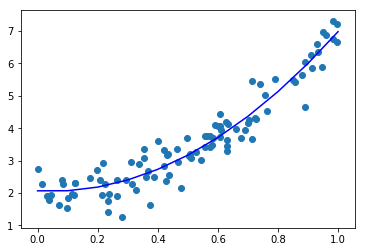

In [22]:
XX = X*X
Xe = np.hstack((XX.reshape(N,1), X.reshape(N,1), np.ones((N,1))))
Dquad = moindresCarres(Xe, Y)
T = np.arange(0,1.1,.1)
plt.figure()
plt.scatter(X, Y)
plt.plot(T, Dquad[0]*(T**2) + Dquad[1]*T + Dquad[2], 'b')
plt.show()

In [23]:
data = np.loadtxt("winequality-red.csv", delimiter=";", skiprows=1)
N,d = data.shape # extraction des dimensions (1599, 12)
pcTrain  = 0.7 # 70% des données en apprentissage
allindex = np.random.permutation(N)
indTrain = allindex[:int(pcTrain*N)]
indTest = allindex[int(pcTrain*N):]
X = data[indTrain,:-1] # pas la dernière colonne (= note à prédire)
Y = data[indTrain,-1]  # dernière colonne (= note à prédire)
# Echantillon de test (pour la validation des résultats)
XT = data[indTest,:-1] # pas la dernière colonne (= note à prédire)
YT = data[indTest,-1]  # dernière colonne (= note à prédire)

In [26]:
Xr = np.hstack((X, np.ones((len(X),1))))
XTr = np.hstack((XT, np.ones((len(XT),1))))
D = moindresCarres(Xr, Y)
print(D)

print("Moyenne des erreurs en apprentissage:", ((Xr.dot(D) - Y)**2).mean())
print ("Moyenne des erreurs en test:",((XTr.dot(D) - YT)**2).mean())
print ("")
print("Taux de reconnaissance en apprentissage:", np.where(np.round(Xr.dot(D)) == np.round(Y),1,0).mean())
print ("Taux de reconnaissance en test:", np.where((np.round(XTr.dot(D)) == np.round(YT)),1, 0).mean())

[ 1.95180462e-02 -1.19951215e+00 -3.12348411e-01  1.54847369e-02
 -1.80855618e+00  3.55618146e-03 -2.85194899e-03 -1.82088870e+01
 -4.47443701e-01  9.55496312e-01  2.75805673e-01  2.25155608e+01]
Moyenne des erreurs en apprentissage: 0.43557199096942556
Moyenne des erreurs en test: 0.37532050334028344

Taux de reconnaissance en apprentissage: 0.5907059874888293
Taux de reconnaissance en test: 0.5875
